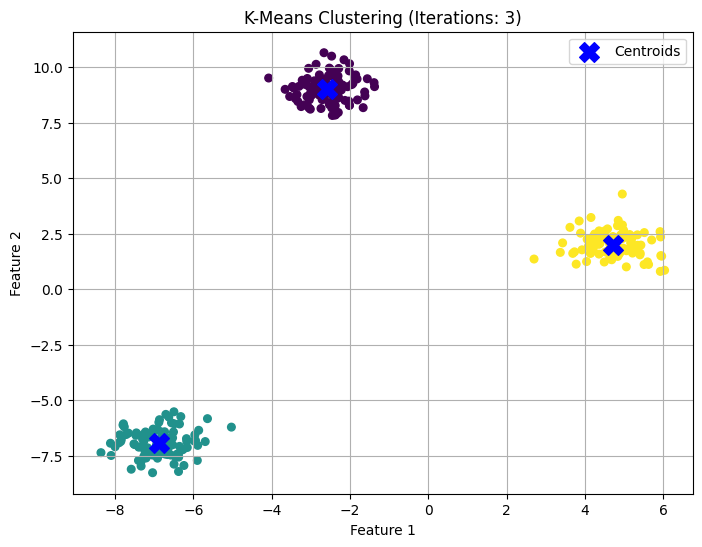

In [5]:
# ques 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def k_means(X, k, max_iter=100, tol=1e-4, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    #  Randomly initializiation of centroid
    n_samples, n_features = X.shape
    initial_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[initial_indices]

    for iteration in range(max_iter):
        # Assigning each data pt to nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)**2
        labels = np.argmin(distances, axis=1)

        # Updating centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
                                  for i in range(k)])

        #  Check convergence
        shifts = np.linalg.norm(new_centroids - centroids, axis=1)
        if np.max(shifts) < tol:
            break

        centroids = new_centroids

    return centroids, labels, iteration + 1

    # Creating 2D data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Apply custom k-means
centroids, labels, n_iters = k_means(X, k=3, random_state=42)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, marker='X', label='Centroids')
plt.title(f"K-Means Clustering (Iterations: {n_iters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()



Saving jonas-morgner-FuimHsYbHP8-unsplash.png to jonas-morgner-FuimHsYbHP8-unsplash (2).png


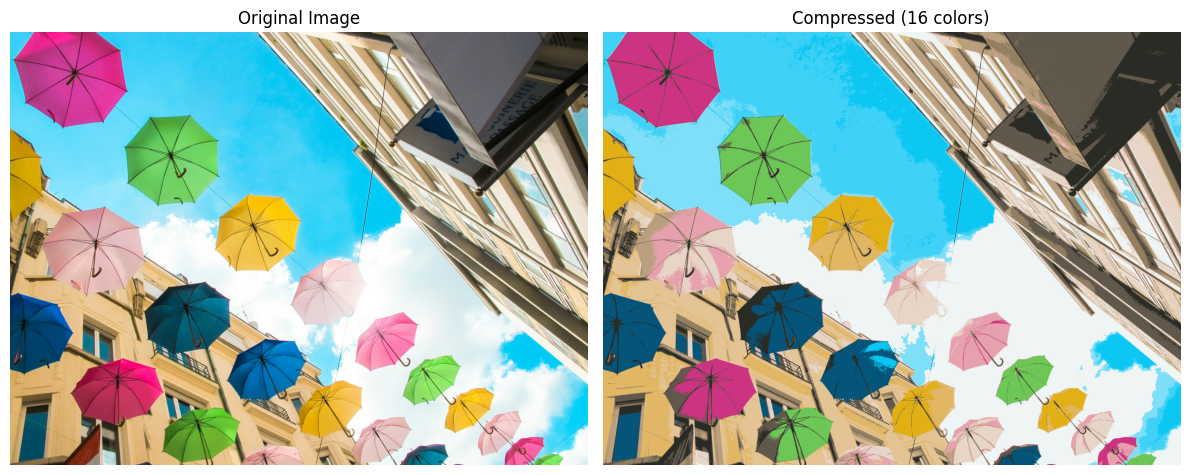

Original size: 7212.23 KB
Compressed size: 843.28 KB
Size reduced by: 88.31%


In [30]:
# ques 2
from google.colab import files
uploaded = files.upload()

from PIL import Image
import numpy as np

filename = list(uploaded.keys())[0]
img = Image.open(filename).convert('RGB')
img.show()
img_np = np.array(img)
h, w, c = img_np.shape  # height, width, channels
pixels = img_np.reshape(-1, 3)  # shape (N, 3)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16, init='k-means++', random_state=42)
kmeans.fit(pixels)

# Replacing each pixel with centroid color
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_pixels = np.clip(compressed_pixels.astype('uint8'), 0, 255)  # ensuring valid RGB
compressed_img_np = compressed_pixels.reshape(h, w, 3)
compressed_img = Image.fromarray(compressed_img_np)
from PIL import ImageOps

# white border for separation
img_border = ImageOps.expand(img, border=10, fill='white')
compressed_img_border = ImageOps.expand(compressed_img, border=10, fill='white')

# Combine images
combined = Image.new('RGB', (img.width + compressed_img.width + 20, img.height))
combined.paste(img_border, (0, 0))
combined.paste(compressed_img_border, (img.width + 20, 0))

combined.show()
img.save("original.png", format="PNG")
compressed_img.save("compressed.png", format="PNG")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(compressed_img)
plt.title("Compressed (16 colors)")
plt.axis("off")

plt.tight_layout()
plt.show()


import os

original_size = os.path.getsize("original.png")
compressed_size = os.path.getsize("compressed.png")

reduction_percent = 100 * (original_size - compressed_size) / original_size
print(f"Original size: {original_size/1024:.2f} KB")
print(f"Compressed size: {compressed_size/1024:.2f} KB")
print(f"Size reduced by: {reduction_percent:.2f}%")


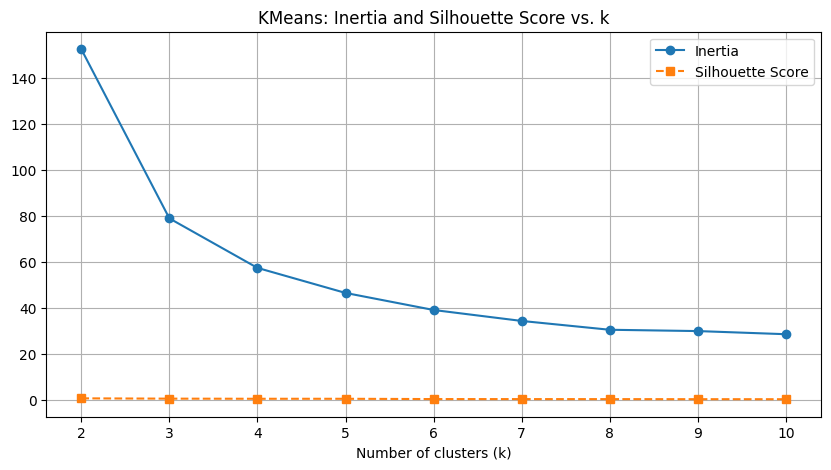

Suggested k by elbow method: 9
Suggested k by silhouette score: 2
The methods suggest different k values.


In [2]:
# ques 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# data loading
iris = load_iris()
X = iris.data

# metrics
ks = range(2, 11)
inertias = []
silhouettes = []

# models
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)
    sil_score = silhouette_score(X, model.labels_)
    silhouettes.append(sil_score)

# Plotting inertia and silhouette score
plt.figure(figsize=(10, 5))
plt.plot(ks, inertias, 'o-', label='Inertia')
plt.plot(ks, silhouettes, 's--', label='Silhouette Score')
plt.xlabel("Number of clusters (k)")
plt.title("KMeans: Inertia and Silhouette Score vs. k")
plt.legend()
plt.grid(True)
plt.show()

# Finding k_elbow
drops = np.diff(inertias)
percent_drops = -np.diff(inertias) / inertias[:-1]
k_elbow = None
for i, pct in enumerate(percent_drops):
    if pct < 0.10:
        k_elbow = ks[i+1]
        break

# max silhouette score
k_silhouette = ks[np.argmax(silhouettes)]

# Print results
print(f"Suggested k by elbow method: {k_elbow}")
print(f"Suggested k by silhouette score: {k_silhouette}")

if k_elbow == k_silhouette:
    print("Both methods agree on k.")
else:
    print("The methods suggest different k values.")


In [16]:
#ques 4
import time
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score

def benchmark_kmeans():
    #  Generate data
    X, y_true = make_blobs(n_samples=1_000_000, n_features=10, centers=10, random_state=42)

    results = {}

    #  Fit Full KMeans
    start = time.perf_counter()
    kmeans = KMeans(n_clusters=10, random_state=42)
    kmeans.fit(X)
    end = time.perf_counter()
    results['KMeans'] = {
        'time': end - start,
        'inertia': kmeans.inertia_,
        'ARI': adjusted_rand_score(y_true, kmeans.labels_)
    }

    #  Fit MiniBatchKMeans
    start = time.perf_counter()
    mb_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10_000, random_state=42)
    mb_kmeans.fit(X)
    end = time.perf_counter()
    results['MiniBatchKMeans'] = {
        'time': end - start,
        'inertia': mb_kmeans.inertia_,
        'ARI': adjusted_rand_score(y_true, mb_kmeans.labels_)
    }

    #  Print summary table
    print(f"{'Algorithm':<20}{'Time (s)':>10}{'Inertia':>15}{'ARI':>10}")
    print("-" * 55)
    for name, stats in results.items():
        print(f"{name:<20}{stats['time']:>10.2f}{stats['inertia']:>15,.2f}{stats['ARI']:>10.4f}")

    return results


benchmark_kmeans()


Algorithm             Time (s)        Inertia       ARI
-------------------------------------------------------
KMeans                    1.17  10,000,158.70    1.0000
MiniBatchKMeans           0.21  10,000,842.53    1.0000


{'KMeans': {'time': 1.167214010000862,
  'inertia': 10000158.698950559,
  'ARI': 1.0},
 'MiniBatchKMeans': {'time': 0.21407536700007768,
  'inertia': 10000842.529979564,
  'ARI': 1.0}}

In [3]:
# ques 5
import numpy as np
from sklearn.preprocessing import normalize
import random

class CosineKMeans:
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-4, random_state=None):
        self.k = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.empty_reinits = 0

    def fit(self, X):
        # Converting sparse matrix to dense matrix
        if hasattr(X, 'toarray'):
            X = X.toarray()
        X = normalize(X, norm='l2')
        n_samples, n_features = X.shape

        # Fix random seed
        if self.random_state is not None:
            np.random.seed(self.random_state)
            random.seed(self.random_state)

        #  Initializing centroids randomly
        init_idx = np.random.choice(n_samples, self.k, replace=False)
        centroids = X[init_idx].copy()

        for iteration in range(self.max_iter):
            centroids = normalize(centroids)
            sim = X @ centroids.T             # cosine similarity
            labels = np.argmax(sim, axis=1)   # closest centroid

            new_centroids = np.zeros((self.k, n_features))

            for i in range(self.k):
                mask = labels == i
                if np.sum(mask) == 0:
                    #   reinitializing to farthest point
                    dists = 1 - np.max(X @ centroids.T, axis=1)
                    farthest = np.argmax(dists)
                    new_centroids[i] = X[farthest]
                    self.empty_reinits += 1
                else:
                    new_centroids[i] = X[mask].mean(axis=0)

            shift = np.max(np.linalg.norm(new_centroids - centroids, axis=1))
            centroids = new_centroids

            if shift < self.tol:
                break

        self.centroids = normalize(centroids)
        self.labels_ = np.argmax(X @ self.centroids.T, axis=1)
        self.inertia_ = np.sum(1 - np.max(X @ self.centroids.T, axis=1))  # cosine-distance inertia
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['sci.space', 'sci.med', 'sci.electronics', 'sci.crypt']
data = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(data.data)

print("Fitting Cosine KMeans on TF-IDF data")
model = CosineKMeans(n_clusters=4, random_state=42)
model.fit(X)

print(f"Final cosine-distance inertia: {model.inertia_:.4f}")
print(f"Number of empty-cluster reinitialisations: {model.empty_reinits}")


Fitting Cosine KMeans on TF-IDF data
Final cosine-distance inertia: 1679.7590
Number of empty-cluster reinitialisations: 0
